In [52]:
pip install pystan

  Using cached pystan-3.10.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.12.15-cp311-cp311-win_amd64.whl (453 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\yuvar\AppData\Local\Temp\pip-install-6loh98d9\pystan_a92d16ea35e1435bbd135a66157fc0a8\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: C:\tenserflow project\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [53]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: C:\tenserflow project\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [54]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [55]:
data = pd.read_csv('coin_Bitcoin.csv')
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [56]:
data = data.rename(columns={'Close': 'y', 'Date':'ds'})
data['y_orig'] = data['y']
data['y'] = np.log(data['y'])

In [57]:
model = Prophet()
model.fit(data)

01:31:47 - cmdstanpy - INFO - Chain [1] start processing
01:31:48 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
#future_data = model.make_dataframe(periods=6, freq='H')

future_data = model.make_future_dataframe(periods=12, freq = 'M')

C:\tenserflow project\tfvenv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [59]:
forecast_data = model.predict(future_data)

In [60]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29 23:59:59,4.673076,4.427975,4.926601
1,2013-04-30 23:59:59,4.674948,4.414118,4.910329
2,2013-05-01 23:59:59,4.675212,4.446767,4.926521
3,2013-05-02 23:59:59,4.674788,4.421318,4.911454
4,2013-05-03 23:59:59,4.675494,4.419845,4.923710


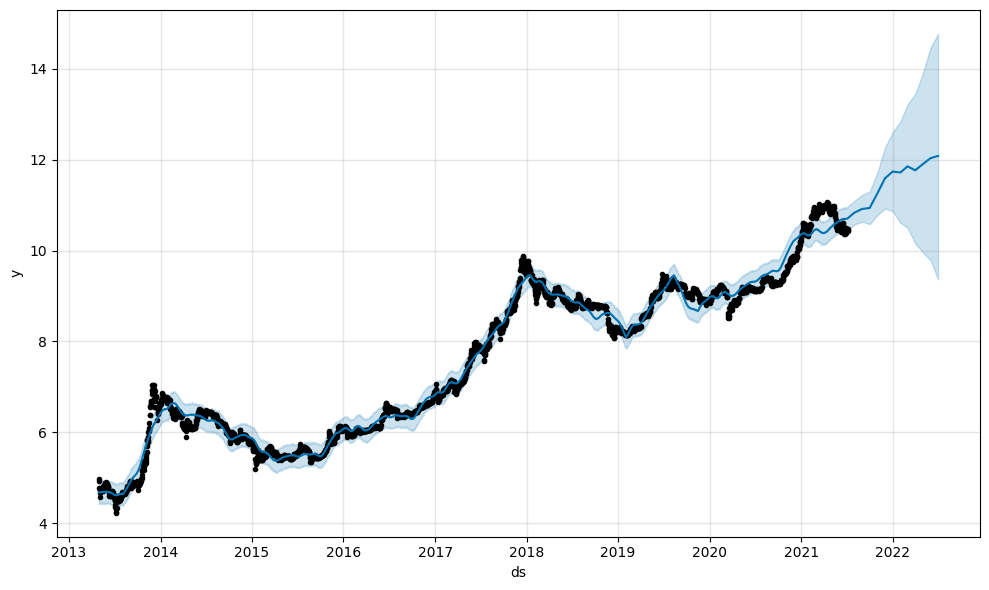

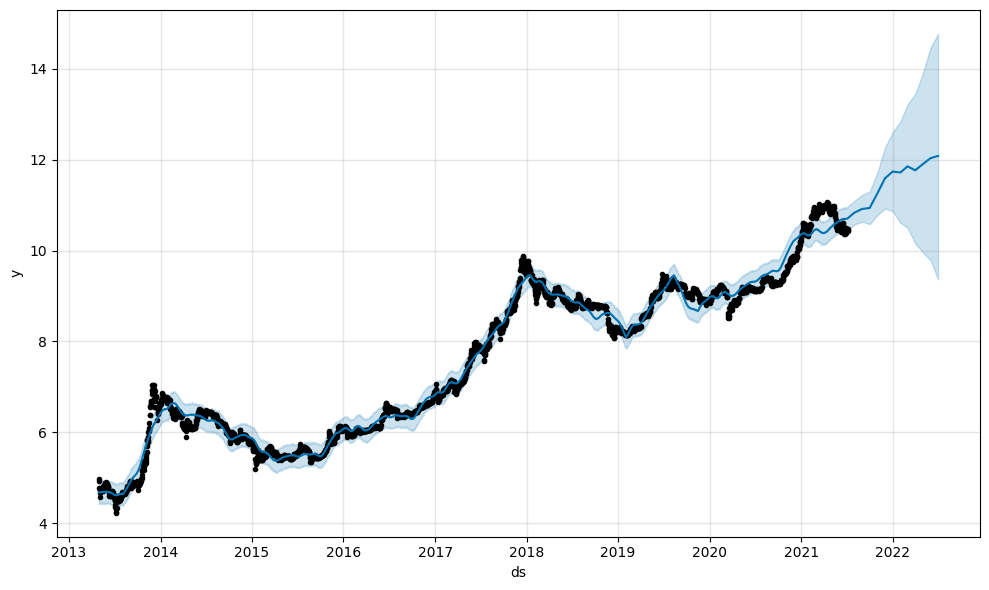

In [61]:
model.plot(forecast_data)

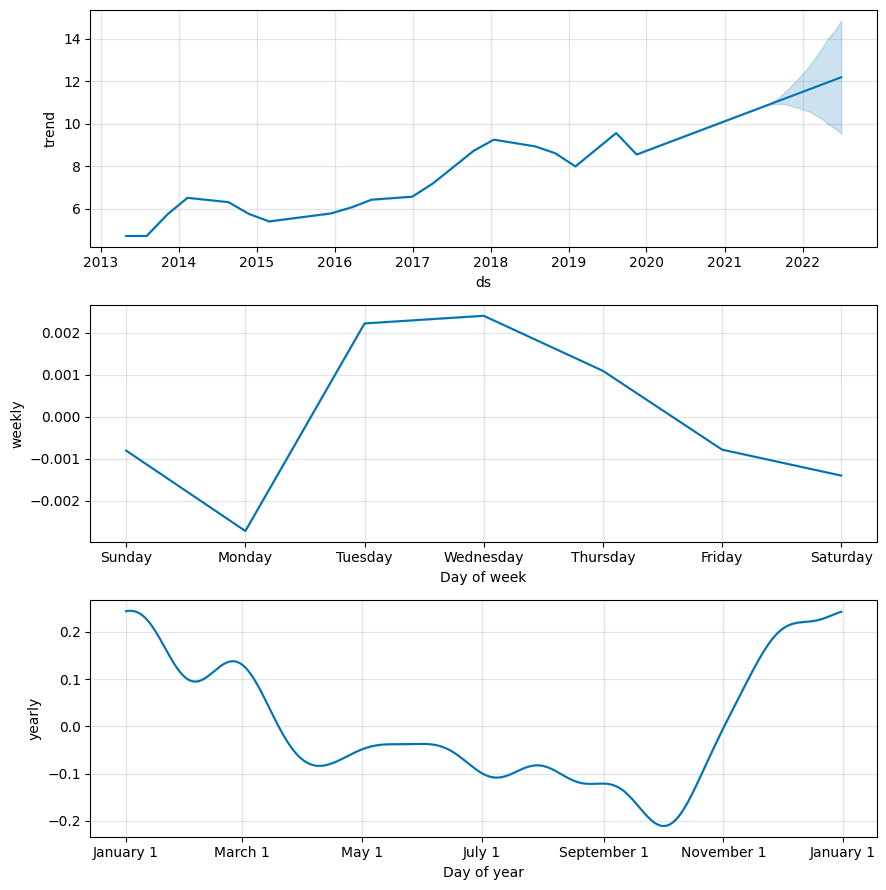

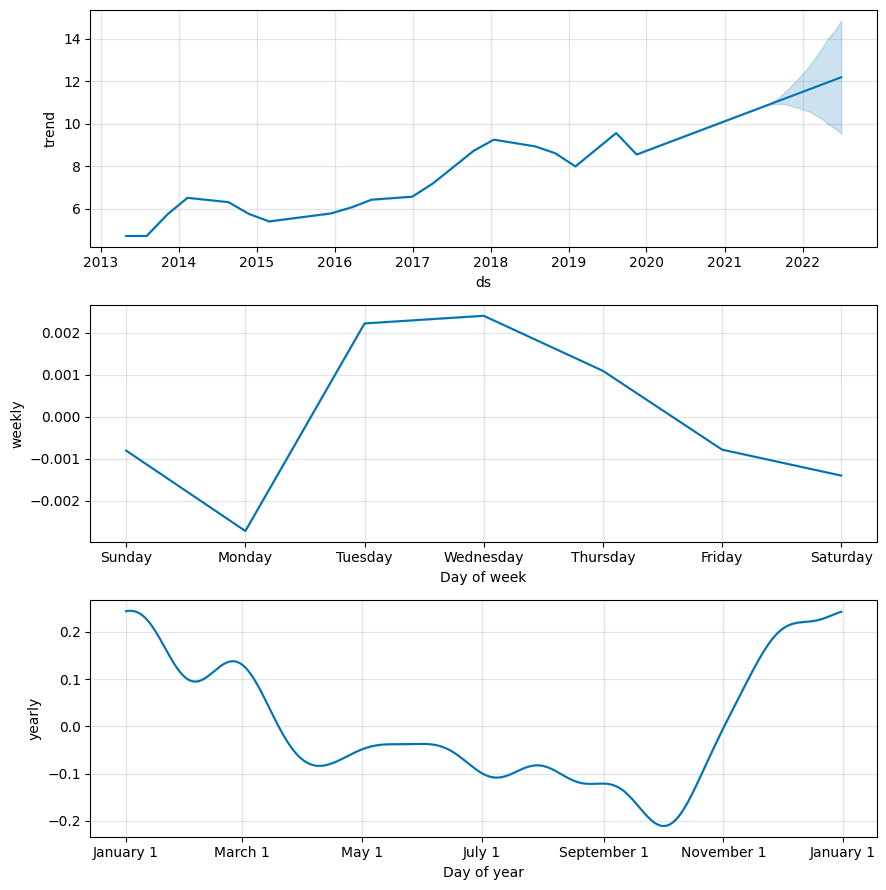

In [62]:
model.plot_components(forecast_data)

In [63]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])#lograthamic transformation
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

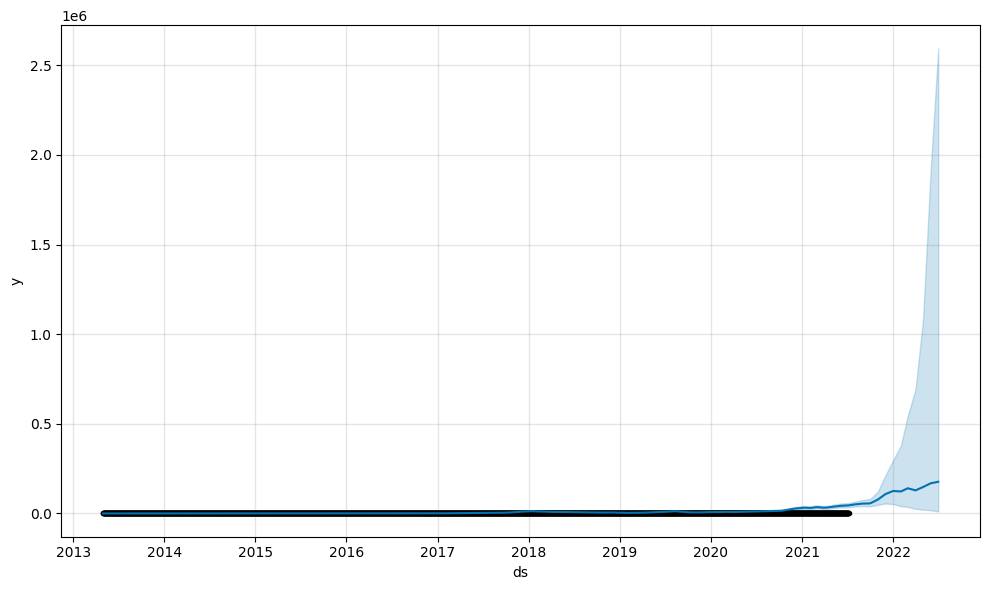

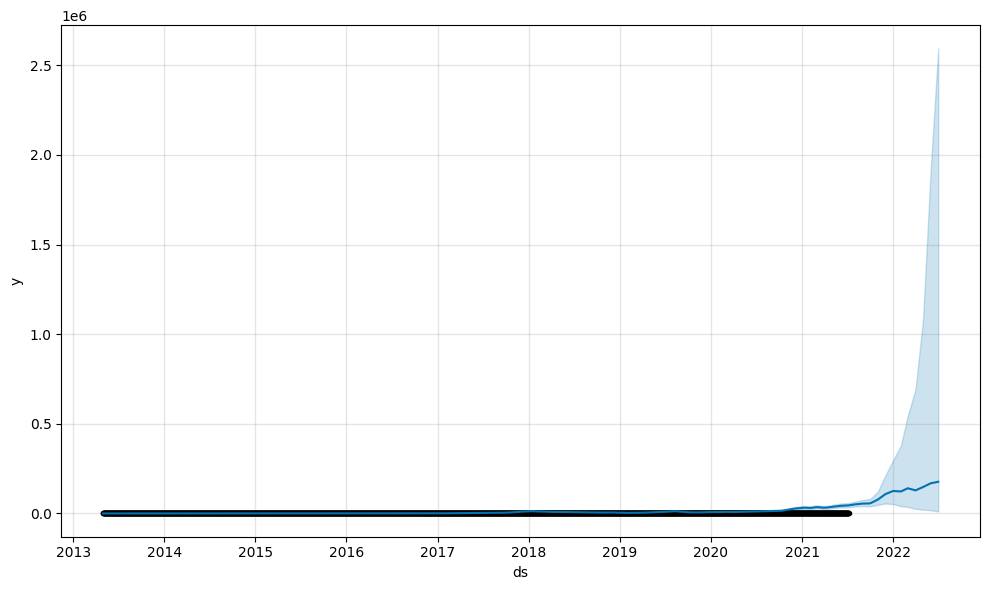

In [64]:
model.plot(forecast_data_orig)

In [65]:
data['y_log'] = data['y'] # copy the log_transformed data to another column
data['y']=data['y_orig']

In [66]:
final_data = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=data["y_orig"],name="Actual")
predict_chart = go.Scatter(y=final_data["yhat"], name ="Predicted")
predict_chart_upper = go.Scatter(y=final_data["yhat_upper"], name="Predicted Upper")
predict_chart_lower = go.Scatter(y=final_data["yhat_lower"], name ="Predicted Lower")
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [68]:
final_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2998,2022-02-28 23:59:59,11.720039,36400.093852,5.457183e+05,10.414544,13.099608,0.133605,0.133605,0.133605,0.002219,0.002219,0.002219,0.131386,0.131386,0.131386,0.0,0.0,0.0,140595.691837
2999,2022-03-31 23:59:59,11.837471,25746.611788,6.943807e+05,10.231438,13.538056,-0.071176,-0.071176,-0.071176,-0.000784,-0.000784,-0.000784,-0.070392,-0.070392,-0.070392,0.0,0.0,0.0,128835.923869
3000,2022-04-30 23:59:59,11.951114,21203.764127,1.082228e+06,9.965884,14.017783,-0.049981,-0.049981,-0.049981,-0.000807,-0.000807,-0.000807,-0.049174,-0.049174,-0.049174,0.0,0.0,0.0,147433.679032
3001,2022-05-31 23:59:59,12.068546,17812.914064,1.921640e+06,9.785913,14.393418,-0.034762,-0.034762,-0.034762,0.002401,0.002401,0.002401,-0.037164,-0.037164,-0.037164,0.0,0.0,0.0,168347.166042
3002,2022-06-30 23:59:59,12.182190,11680.077676,2.593764e+06,9.538727,14.840012,-0.099230,-0.099230,-0.099230,-0.000784,-0.000784,-0.000784,-0.098447,-0.098447,-0.098447,0.0,0.0,0.0,176832.685558


In [69]:
# Clip upper bound to a maximum value (optional)
max_clip = final_data['yhat'].max() * 2  # e.g., twice the max predicted value
final_data['yhat_upper'] = final_data['yhat_upper'].clip(upper=max_clip)
final_data['yhat_lower'] = final_data['yhat_lower'].clip(lower=0)

In [70]:
future_data = final_data[final_data['ds'] <= '2030-12-31']

In [71]:
# Ensure both are datetime
final_data['ds'] = pd.to_datetime(final_data['ds'])
data['ds'] = pd.to_datetime(data['ds'])

# Now merge
final_data = final_data.merge(data[['ds', 'y']], on='ds', how='left')

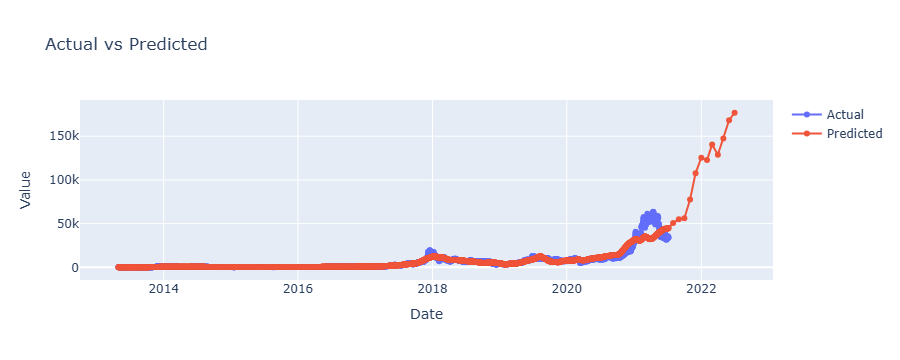

In [72]:
import plotly.graph_objs as go

predict_chart = go.Scatter(
    y=final_data["yhat"],
    x=final_data["ds"],
    mode='lines+markers',
    name="Predicted",
    hovertemplate='Date: %{x}<br>Predicted: %{y:.2f}<extra></extra>'
)

actual_chart = go.Scatter(
    y=final_data["y"],
    x=final_data["ds"],
    mode='lines+markers',
    name="Actual"
)

fig = go.Figure([actual_chart, predict_chart])
fig.update_layout(title="Actual vs Predicted", xaxis_title="Date", yaxis_title="Value")
fig.show()

In [73]:
final_data.to_csv("cleaned_forecast.csv", index=False)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop any missing values (in case the merge created NaNs)
final_eval = final_data.dropna(subset=['y', 'yhat'])

rmse = np.sqrt(mean_squared_error(final_eval['y'], final_eval['yhat']))
mae = mean_absolute_error(final_eval['y'], final_eval['yhat'])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 4151.62
MAE: 1496.86


In [76]:
import pickle

# Save the trained model
with open("prophet_bitcoin_model.pkl", "wb") as f:
    pickle.dump(model, f)